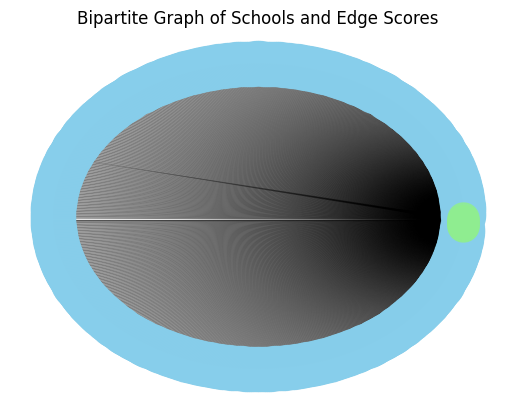

In [11]:
# Read CSV file
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'

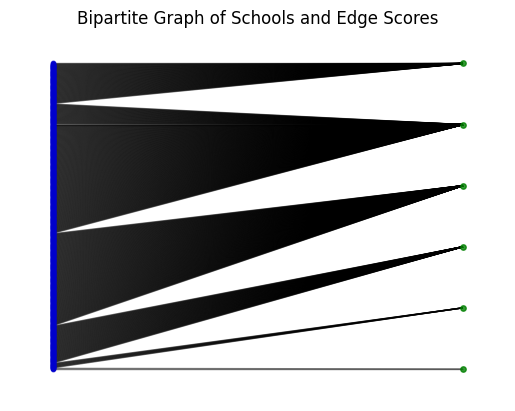

<Figure size 5e+06x5e+06 with 0 Axes>

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file
file_path = 'Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012__20240416.csv'
df = pd.read_csv(file_path)

# Extract unique school names
schools = df['Name of School'].unique().tolist()

# Create a bipartite graph
B = nx.Graph()

# Add school nodes
B.add_nodes_from(schools, bipartite='school')

# Map school names to 'Edge Score' and add edges to the graph
school_edge_scores = df.set_index('Name of School')['Edge Score'].to_dict()

for school, edge_score in school_edge_scores.items():
    B.add_edge(school, edge_score, weight=edge_score)
    B.nodes[edge_score]['bipartite'] = 'edge_score'

# Draw the bipartite graph with standard layout
pos = nx.bipartite_layout(B, schools, scale=500)

# Separate schools and edge scores
school_nodes = [node for node, data in B.nodes(data=True) if data['bipartite'] == 'school']
edge_score_nodes = [node for node, data in B.nodes(data=True) if data['bipartite'] == 'edge_score']

# Define node colors
node_colors = [plt.cm.RdYlGn(edge_score / max(school_edge_scores.values())) for edge_score in school_edge_scores.values()]

# Draw nodes
nx.draw_networkx_nodes(B, pos, nodelist=school_nodes, node_color='mediumblue', node_size=10, alpha=0.8)
nx.draw_networkx_nodes(B, pos, nodelist=edge_score_nodes, node_color='green', node_size=15, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(B, pos, width=1.0, alpha=0.5, edge_color='black')

# Set plot title and display the graph
plt.title('Bipartite Graph of Schools and Edge Scores')
plt.axis('off')
plt.figure(figsize=(50000, 50000))
plt.show()
